In [2]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas 
import math

In [3]:
def distance(a, b):
    return math.sqrt(np.sum(np.square(np.array(a) - np.array(b))))

def midpoint(a, b):
    return (np.array(a) + np.array(b)) / 2


In [58]:
DATA_PATH = "data/New/"

DISCARD_AMOUNT = [2400, 2350, 0, 0, 0, 0, 0, 2500]

# 10g
MASS = 10

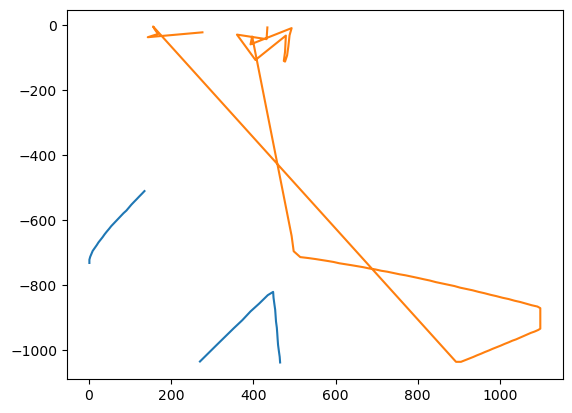

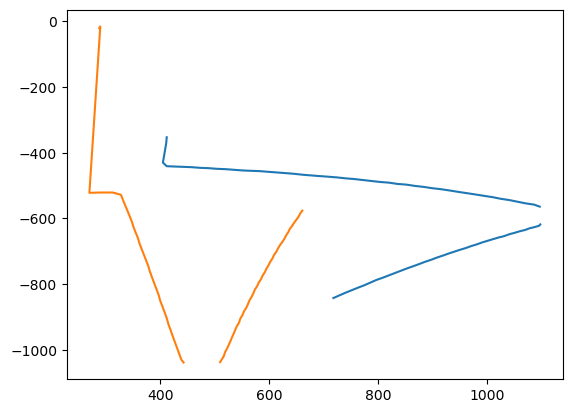

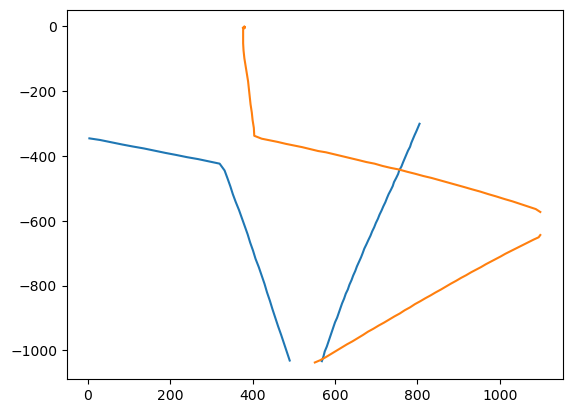

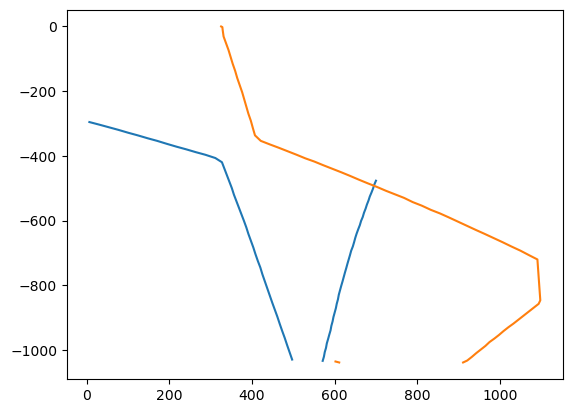

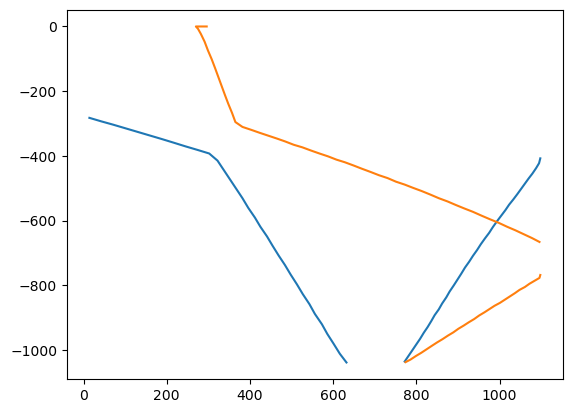

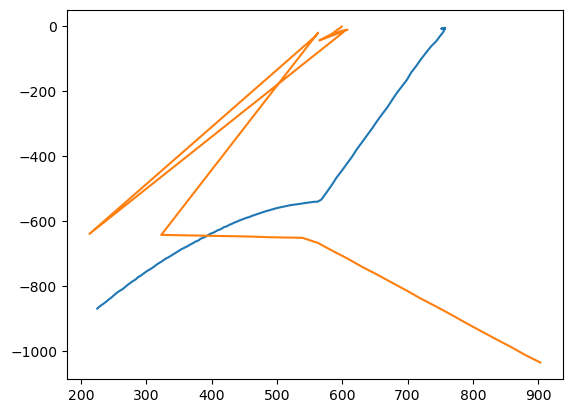

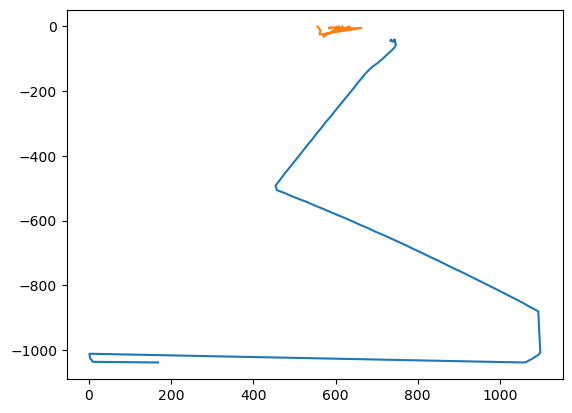

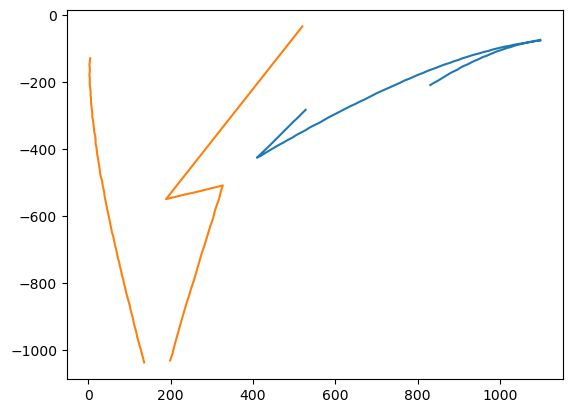

In [5]:
for i in range(1, 9):
    data = pandas.read_csv(DATA_PATH + "{}.csv".format(i))
    data = data[data["timestamp"] > DISCARD_AMOUNT[i-1]]      

    plt.plot(data["position_px_x-hotpink"], -1 * data["position_px_y-hotpink"])    
    plt.plot(data["position_px_x-lightorange"], -1 * data["position_px_y-lightorange"])          
    plt.show()

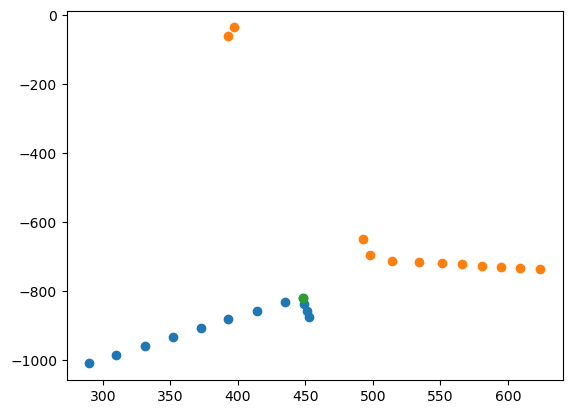

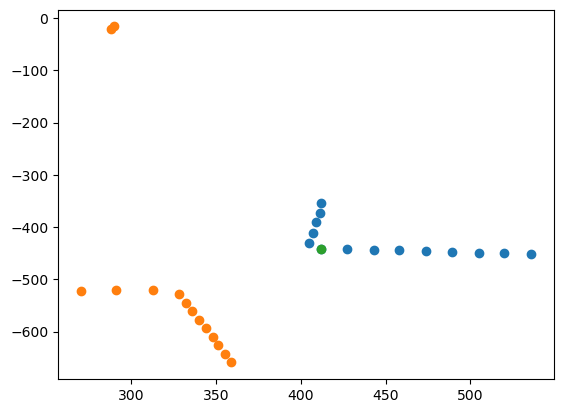

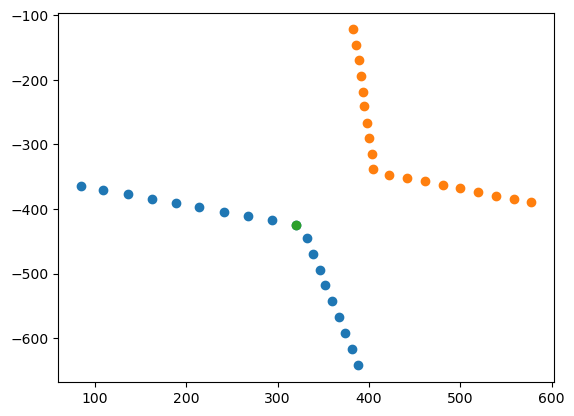

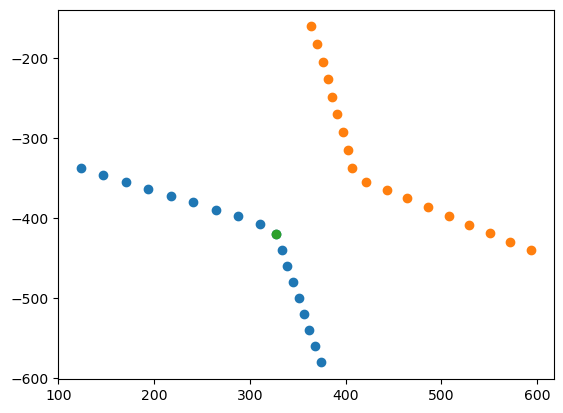

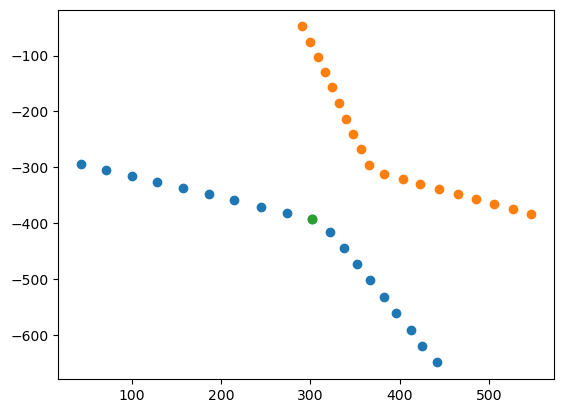

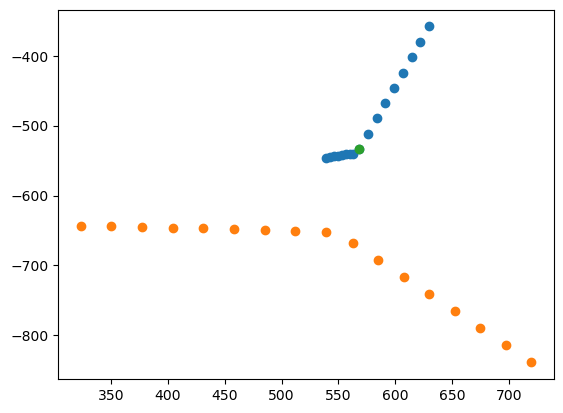

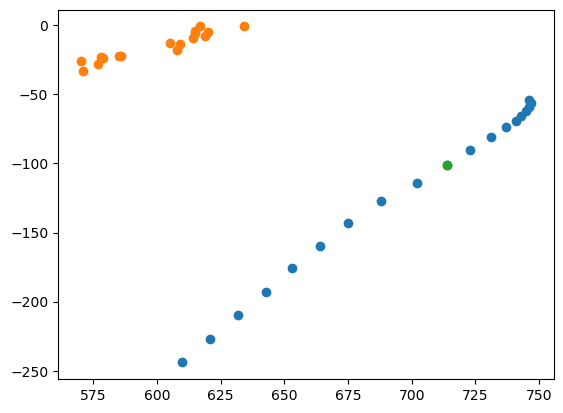

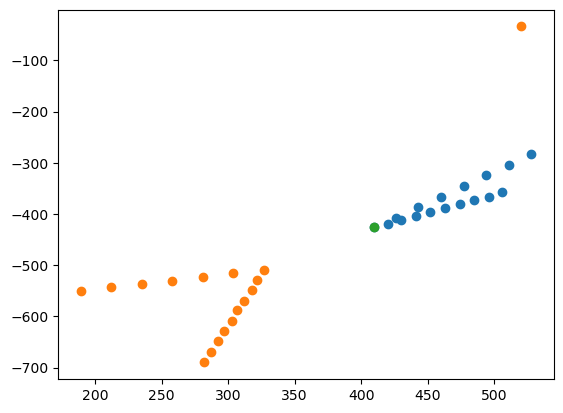

In [64]:
aroundContacts = []

for i in range(1, 9):
    data = pandas.read_csv(DATA_PATH + "{}.csv".format(i)) 
    data = data[data["timestamp"] > DISCARD_AMOUNT[i-1]]      

    minDist = 100000
    mintime = 0
    for _, row in data.iterrows():      
        time = row["timestamp"]
        pink_x = row["position_px_x-hotpink"]
        pink_y = row["position_px_y-hotpink"]      
        pink_vx = row["vx-hotpink"]
        pink_vy = row["vy-hotpink"]
        orange_x = row["position_px_x-lightorange"]
        orange_y = row["position_px_y-lightorange"]              
        orange_vx = row["vx-lightorange"]
        orange_vy = row["vy-lightorange"]  

        if distance([pink_x, pink_y], [orange_x, orange_y]) < minDist:
            mintime = time
            minDist = distance([pink_x, pink_y], [orange_x, orange_y])            
    
    aroundContact = data[abs(data['timestamp'] - mintime) < 300]
    beforeContact = aroundContact[aroundContact['timestamp'] < mintime]
    afterContact = aroundContact[aroundContact['timestamp'] >= mintime]         

    plt.scatter(aroundContact["position_px_x-hotpink"], -1 * aroundContact["position_px_y-hotpink"])    
    plt.scatter(aroundContact["position_px_x-lightorange"], -1 * aroundContact["position_px_y-lightorange"])          
    plt.scatter(aroundContact[aroundContact['timestamp'] == mintime]["position_px_x-hotpink"], -1 * aroundContact[aroundContact['timestamp'] == mintime]["position_px_y-hotpink"])
    plt.show()

    aroundContacts.append((beforeContact, afterContact))

In [45]:
before, after = aroundContacts[0]

before

,frame_no,timestamp,size_px-hotpink,position_px_x-hotpink,position_px_y-hotpink,rx-hotpink,ry-hotpink,vx-hotpink,vy-hotpink,ax-hotpink,ay-hotpink,size_px-lightorange,position_px_x-lightorange,position_px_y-lightorange,rx-lightorange,ry-lightorange,vx-lightorange,vy-lightorange,ax-lightorange,ay-lightorange
7,67,2236.4,11.0,459.0,966.0,35.838097,75.423968,-3.514100,-42.508575,8.142777e+00,-3.549815,34,477,112,37.243512,8.744808,3.459553,0.237271,100.951751,-1254.548147
8,68,2268.8,11.0,458.0,947.0,35.760018,73.940474,-3.120026,-42.510349,-1.452805e-13,7.792272,38,482,93,37.633905,7.261314,6.240051,-28.470234,46.753631,-740.265826
9,69,2304.5,11.0,457.0,930.0,35.681939,72.613137,-2.733730,-42.182798,-7.788311e+00,-15.209102,38,485,66,37.868141,5.153190,-31.597434,-19.934483,-804.698333,289.379555
10,70,2337.0,11.0,455.0,911.0,35.525782,71.129643,-3.113860,-42.424014,-1.857140e-01,5.230944,38,488,31,38.102377,2.420438,-31.376095,-29.772989,-793.509373,657.922698
11,71,2368.9,11.0,454.0,893.0,35.447703,69.724227,-3.505755,-42.467231,-7.706883e+00,-6.930762,24,493,9,38.492770,0.702708,4.294317,215.673933,-85.629446,5618.271152
12,72,2404.5,11.0,453.0,875.0,35.369625,68.318812,-3.511395,-42.921814,-7.764981e+00,0.428789,61,393,59,30.684906,4.606640,4.995747,245.183962,1536.561957,5012.989337
13,73,2437.0,11.0,451.0,857.0,35.213467,66.913396,-7.825084,-31.632443,-9.403876e+01,210.600464,38,397,35,30.997221,2.732752,10.323133,267.042522,1627.493946,5278.387531
14,74,2469.2,11.0,449.0,838.0,35.057310,65.429902,-15.627440,-14.337739,-2.340017e+02,567.837885,15,493,648,38.492770,50.594960,16.030095,274.929100,319.642967,-4436.712475


In [63]:
def findUncertainty(x):
    return np.average(x), np.std(x)/math.sqrt(len(x))

for d in aroundContacts:
    before, after = d

    beforePinkPX, beforePinkPXUncert = findUncertainty(np.array(before["vx-hotpink"]) * MASS)
    beforePinkPY, beforePinkPYUncert = findUncertainty(np.array(before["vy-hotpink"]) * MASS)
    beforeOrangePX, beforeOrangePXUncert = findUncertainty(np.array(before["vx-lightorange"]) * MASS)
    beforeOrangePY, beforeOrangePYUncert = findUncertainty(np.array(before["vy-lightorange"]) * MASS)    

    afterPinkPX, afterPinkPXUncert = findUncertainty(np.array(after["vx-hotpink"]) * MASS)
    afterPinkPY, afterPinkPYUncert = findUncertainty(np.array(after["vy-hotpink"]) * MASS)
    afterOrangePX, afterOrangePXUncert = findUncertainty(np.array(after["vx-lightorange"]) * MASS)
    afterOrangePY, afterOrangePYUncert = findUncertainty(np.array(after["vy-lightorange"]) * MASS)

    totalBeforePX = beforePinkPX + beforeOrangePX
    totalAfterPX = afterPinkPX + afterOrangePX

    totalBeforePY = beforePinkPY + beforeOrangePY
    totalAfterPY = afterPinkPY + afterOrangePY

    print(totalBeforePX, totalAfterPX)
    print(totalBeforePY, totalAfterPY)
    print()

    

14.616855862979293 nan
2327.5452954973043 nan

156.55947784720183 457.5189637499237
2333.8807114539454 420.0183796576613

675.7274102510182 629.8203887690252
716.4399431579931 707.2217603221504

678.0469284262732 647.4191107961805
722.4871164969973 721.2375660661801

nan 831.1531953428846
nan 894.9154228207522

46.366227437322095 448.52488858021934
1396.3048687681044 582.484011702338

nan nan
nan nan

-442.0485453560555 134.72317538091735
1161.565714501627 296.38209472778976

